In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [9]:
print("Customers Dataset:")
print(customers.info(), "\n")
print("Products Dataset:")
print(products.info(), "\n")
print("Transactions Dataset:")
print(transactions.info(), "\n")

Customers Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None 

Products Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None 

Transactions Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column        

In [11]:
print("Missing Values:\n")
print("Customers:", customers.isnull().sum(), "\n")
print("Products:", products.isnull().sum(), "\n")
print("Transactions:", transactions.isnull().sum(), "\n")

Missing Values:

Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64 

Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64 

Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64 



In [15]:
merged_data = transactions.merge(customers, on="CustomerID").merge(products, on="ProductID")
print("Merged Dataset Sample:")
print(merged_data.head())

Merged Dataset Sample:
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortL

In [17]:
# 1. Top 5 Regions by Total Transaction Value
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
print("Top Regions by Sales:")
print(region_sales)

Top Regions by Sales:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


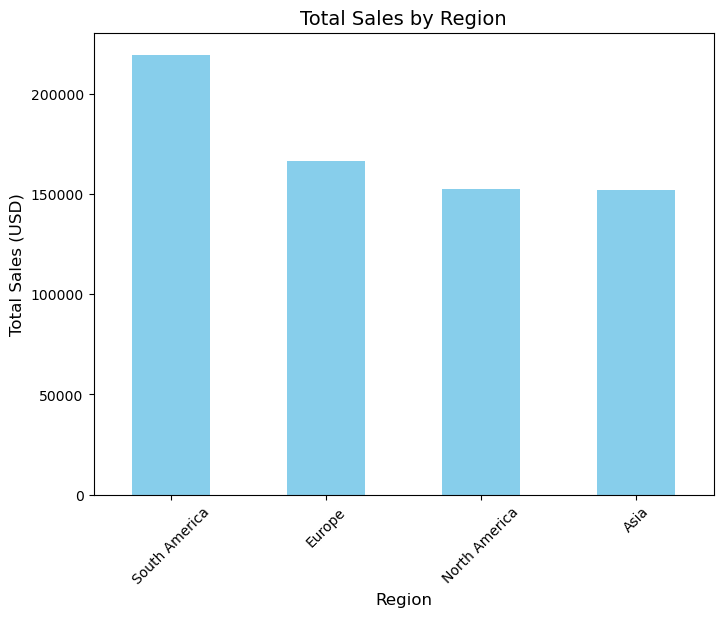

In [19]:
# Plotting the top regions
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [21]:
# 2. Most Purchased Product Categories
category_sales = merged_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)
print("Top Product Categories by Quantity Sold:")
print(category_sales)

Top Product Categories by Quantity Sold:
Category
Books          681
Home Decor     639
Electronics    627
Clothing       590
Name: Quantity, dtype: int64


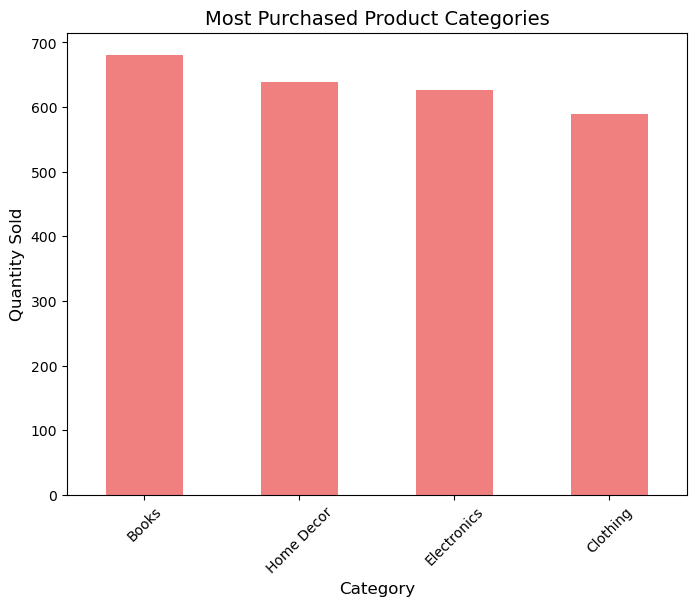

In [23]:
# Plotting top product categories
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar', color='lightcoral')
plt.title("Most Purchased Product Categories", fontsize=14)
plt.xlabel("Category", fontsize=12)
plt.ylabel("Quantity Sold", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [25]:
# 3. Top 10 Customers by Spending
customer_spending = merged_data.groupby('CustomerName')['TotalValue'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customers by Spending:")
print(customer_spending)

Top 10 Customers by Spending:
CustomerName
Paul Parsons            10673.87
Bruce Rhodes             8040.39
Gerald Hines             7663.70
William Adams            7634.45
Aimee Taylor             7572.91
Anna Ball                7111.32
Mrs. Kimberly Wright     7073.28
Jennifer Pena            6819.57
Rodney Eaton             6715.72
Juan Mcdaniel            6708.10
Name: TotalValue, dtype: float64


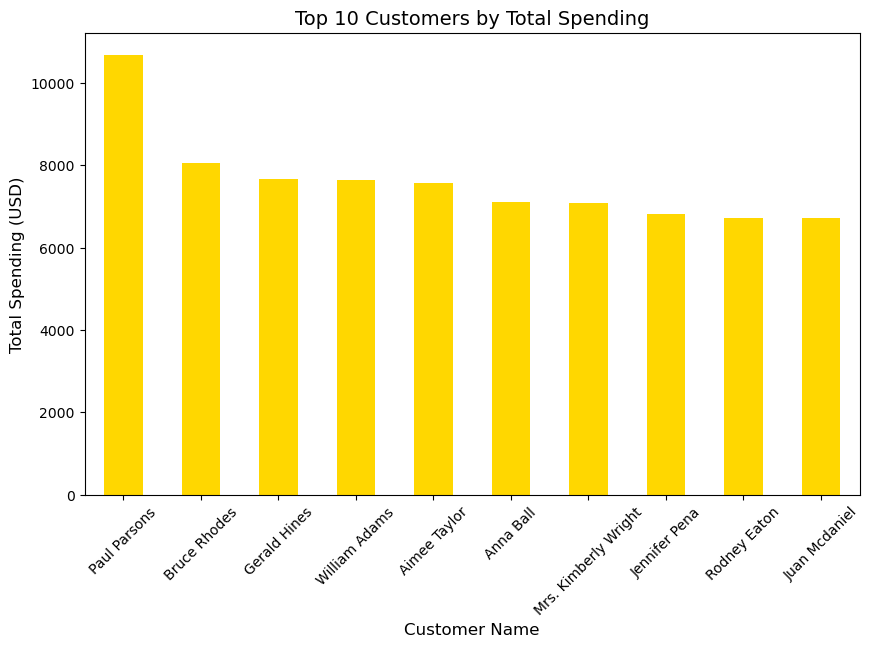

In [27]:
# Plotting top customers
plt.figure(figsize=(10, 6))
customer_spending.plot(kind='bar', color='gold')
plt.title("Top 10 Customers by Total Spending", fontsize=14)
plt.xlabel("Customer Name", fontsize=12)
plt.ylabel("Total Spending (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [29]:
# 4. Sales Trends Over Time
merged_data['TransactionDate'] = pd.to_datetime(merged_data['TransactionDate'])
sales_trends = merged_data.groupby(merged_data['TransactionDate'].dt.to_period('M'))['TotalValue'].sum()


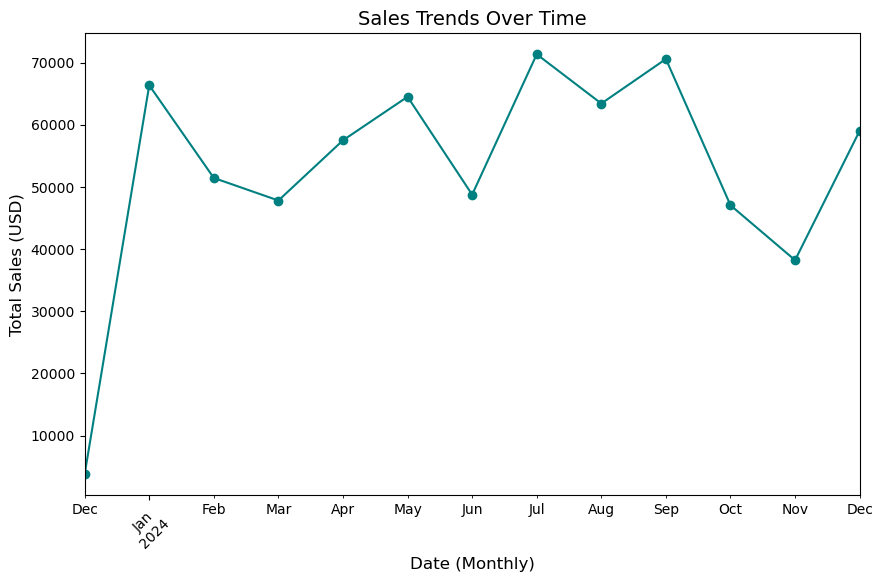

In [31]:
# Plotting sales trends
plt.figure(figsize=(10, 6))
sales_trends.plot(kind='line', marker='o', color='teal')
plt.title("Sales Trends Over Time", fontsize=14)
plt.xlabel("Date (Monthly)", fontsize=12)
plt.ylabel("Total Sales (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [33]:
# 5. Average Order Value (AOV) by Region
region_aov = merged_data.groupby('Region')['TotalValue'].mean().sort_values(ascending=False)
print("Average Order Value (AOV) by Region:")
print(region_aov)

Average Order Value (AOV) by Region:
Region
South America    721.554474
Europe           710.489872
Asia             697.591606
North America    624.235246
Name: TotalValue, dtype: float64


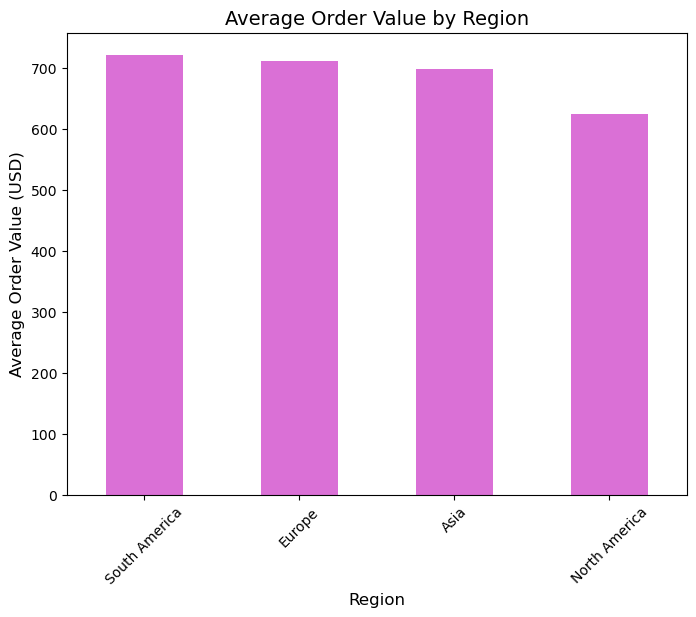

In [37]:
plt.figure(figsize=(8, 6))
region_aov.plot(kind='bar', color='orchid')
plt.title("Average Order Value by Region", fontsize=14)
plt.xlabel("Region", fontsize=12)
plt.ylabel("Average Order Value (USD)", fontsize=12)
plt.xticks(rotation=45)
plt.show()

In [39]:
print("\nBusiness Insights:")
print("1. Region with highest sales is {} with total sales of ${:.2f}. Focus on this region for targeted marketing.".format(region_sales.idxmax(), region_sales.max()))
print("2. The most popular product category is '{}', accounting for the highest quantity sold. Promote products from this category.".format(category_sales.idxmax()))
print("3. The customer '{}' is the highest spender with a total spending of ${:.2f}. Consider offering loyalty rewards.".format(customer_spending.idxmax(), customer_spending.max()))
print("4. Sales peak during certain months. Optimize inventory during these times to meet increased demand.")
print("5. Regions with higher Average Order Value (AOV) like '{}' should be targeted for premium product promotions.".format(region_aov.idxmax()))


Business Insights:
1. Region with highest sales is South America with total sales of $219352.56. Focus on this region for targeted marketing.
2. The most popular product category is 'Books', accounting for the highest quantity sold. Promote products from this category.
3. The customer 'Paul Parsons' is the highest spender with a total spending of $10673.87. Consider offering loyalty rewards.
4. Sales peak during certain months. Optimize inventory during these times to meet increased demand.
5. Regions with higher Average Order Value (AOV) like 'South America' should be targeted for premium product promotions.
